# Importing required libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from lightgbm import LGBMRegressor, plot_importance
# from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [63]:
import pandas.util.testing as tm

# Reading data from csv files

In [64]:
train = pd.read_csv('train_ibm.csv')
test = pd.read_csv('test_ibm.csv')
meal_info = pd.read_csv('meal_info.csv')
fulfilment_center_info = pd.read_csv('fulfilment_center_info.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Merging data of various files

In [65]:
train = pd.merge(train,fulfilment_center_info, on = 'center_id')
test = pd.merge(test,fulfilment_center_info, on = 'center_id')

train = pd.merge(train,meal_info, on = 'meal_id')
test = pd.merge(test,meal_info, on = 'meal_id')

In [66]:
# cols = ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 
#        'city_code_x', 'region_code_x', 'center_type_x', 'op_area_x', 'category_x', 'cuisine_x', 'city_code_y', 'region_code_y',
#  'center_type_y', 'op_area_y', 'category_y', 'cuisine_y', 'num_orders']
# train = train[['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 
#        'city_code_x', 'region_code_x', 'center_type_x', 'op_area_x', 'category_x', 'cuisine_x', 'city_code_y', 'region_code_y',
#  'center_type_y', 'op_area_y', 'category_y', 'cuisine_y', 'num_orders']]

# Rearranging Columns of train
train = train[['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'num_orders']]

In [88]:
# train.to_csv(r'C:\Users\Rahul Kanwal\Desktop\SBSPS-Challenge-1497-Optimized-Warehouse-Management-of-Perishable-Goods-for-a-Food-Delivery-Company\final_train.csv', index = False)
# print('File Created :D')

File Created :D


In [89]:
# test.to_csv(r'C:\Users\Rahul Kanwal\Desktop\SBSPS-Challenge-1497-Optimized-Warehouse-Management-of-Perishable-Goods-for-a-Food-Delivery-Company\final_test.csv', index = False)
# print('File Created :D')

File Created :D


In [8]:
# train_test = pd.merge(train,test, how = "outer")

In [10]:
# train_test.to_csv('D:\Series\train_test.csv')

# Basic info about data

In [67]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai,177
1,1018704,2,55,1885,135.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai,323
2,1196273,3,55,1885,132.92,133.92,0,0,647,56,TYPE_C,2.0,Beverages,Thai,96
3,1116527,4,55,1885,135.86,134.86,0,0,647,56,TYPE_C,2.0,Beverages,Thai,163
4,1343872,5,55,1885,146.50,147.50,0,0,647,56,TYPE_C,2.0,Beverages,Thai,215


In [68]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [70]:
train.shape

(456548, 15)

In [71]:
test.shape

(32573, 14)

# Checking for null values

In [72]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
num_orders               0
dtype: int64

In [73]:
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

# Exploratory Data Analysis (Visualizing Data)

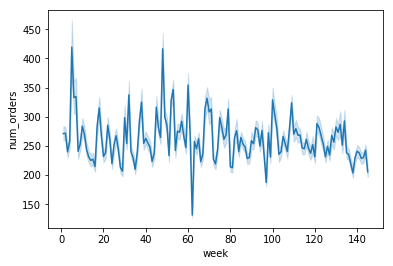

In [74]:
sns.lineplot(train['week'], train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

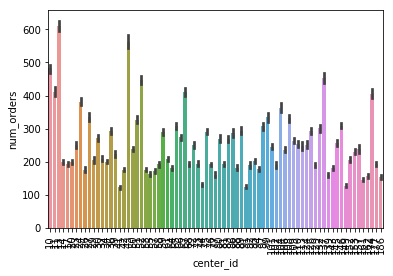

In [75]:
sns.barplot(train['center_id'], train['num_orders'])
plt.xticks(rotation = 90)

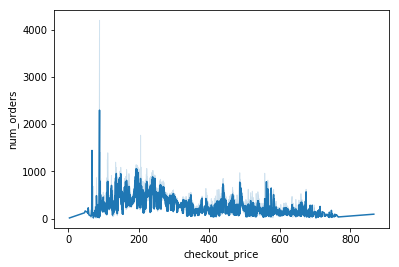

In [10]:
sns.lineplot(train['checkout_price'], train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

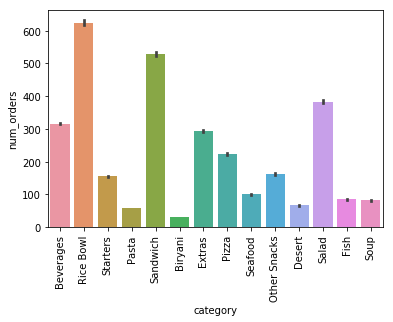

In [14]:
sns.barplot(train['category'], train['num_orders'])
plt.xticks(rotation = 90)

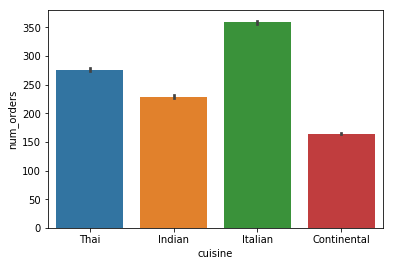

In [15]:
sns.barplot(train['cuisine'], train['num_orders'])

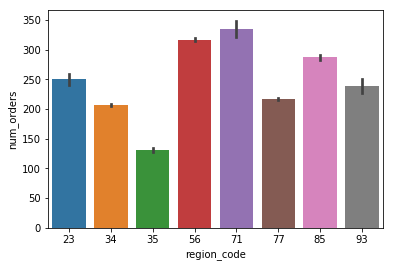

In [16]:
sns.barplot(train['region_code'], train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

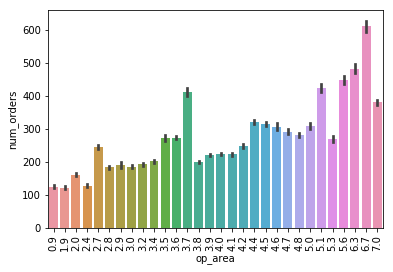

In [17]:
sns.barplot(train['op_area'], train['num_orders'])
plt.xticks(rotation = 90)

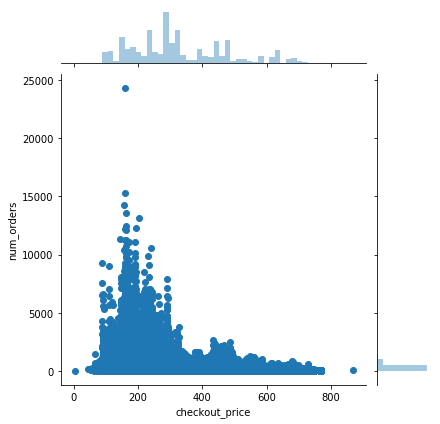

In [18]:
sns.jointplot(x = 'checkout_price', y = 'num_orders', data = train)

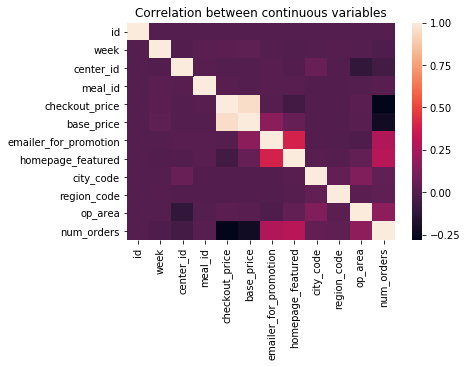

In [76]:
_ = sns.heatmap(train.corr())
_ = plt.title('Correlation between continuous variables')
plt.show()

# Dividing data into training and validation sets

In [86]:
# Dependent variable y
y = train.num_orders

# Independent variable X
X = train.iloc[:, :-1].values

# X = train[['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
#        'emailer_for_promotion', 'homepage_featured', 'city_code',
#        'region_code', 'center_type', 'op_area', 'category', 'cuisine']]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)